In [1]:
import torch
from torch import nn
from torchvision.datasets import MNIST, CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision.models import resnet18
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
from torch import optim
from torchvision.models import resnet18
import torch
from tqdm import tqdm


## download CIFAR-10

In [3]:
from torchvision.datasets import MNIST, CIFAR10
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
from torchvision.models import resnet18


batch_size = 64
train_data = CIFAR10(
        root="data",
        train=True,
        download=True,
        transform=ToTensor(),
    )
test_data = CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

train_dataloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


## ResNet18

In [6]:
epochs = 100
learning_rate = 0.01

In [13]:
from torchvision.models import ResNet18_Weights


class ClassifierHead(nn.Module):
    def __init__(self):
        super().__init__()
        self.classifier = nn.Linear(in_features=512, out_features=10, bias=True)
    
    def forward(self, x):
        return self.classifier(x)


device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = resnet18(weights=ResNet18_Weights.DEFAULT).to(device)
model.fc = ClassifierHead().to(device)

optimizer = optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()

In [14]:
# Training function.
def train(model, trainloader, optimizer, criterion, device):
    model.train()
    print("Training")
    train_running_loss = 0.0
    train_running_correct = 0
    counter = 0
    for i, data in tqdm(enumerate(trainloader), total=len(trainloader)):
        counter += 1
        image, labels = data
        image = image.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        # Forward pass.
        outputs = model(image)
        # Calculate the loss.
        loss = criterion(outputs, labels)
        train_running_loss += loss.item()
        # Calculate the accuracy.
        _, preds = torch.max(outputs.data, 1)
        train_running_correct += (preds == labels).sum().item()
        # Backpropagation
        loss.backward()
        # Update the weights.
        optimizer.step()

    # Loss and accuracy for the complete epoch.
    epoch_loss = train_running_loss / counter
    # epoch_acc = 100. * (train_running_correct / len(trainloader.dataset))
    epoch_acc = 100.0 * (train_running_correct / len(trainloader.dataset))
    return epoch_loss, epoch_acc


# Validation function.
def validate(model, testloader, criterion, device):
    model.eval()
    print("Validation")
    valid_running_loss = 0.0
    valid_running_correct = 0
    counter = 0

    with torch.no_grad():
        for i, data in tqdm(enumerate(testloader), total=len(testloader)):
            counter += 1

            image, labels = data
            image = image.to(device)
            labels = labels.to(device)
            # Forward pass.
            outputs = model(image)
            # Calculate the loss.
            loss = criterion(outputs, labels)
            valid_running_loss += loss.item()
            # Calculate the accuracy.
            _, preds = torch.max(outputs.data, 1)
            valid_running_correct += (preds == labels).sum().item()

    # Loss and accuracy for the complete epoch.
    epoch_loss = valid_running_loss / counter
    epoch_acc = 100.0 * (valid_running_correct / len(testloader.dataset))
    return epoch_loss, epoch_acc

In [15]:
def run_iterations(): # Lists to keep track of losses and accuracies.
    train_loss, valid_loss = [], []
    train_acc, valid_acc = [], []
    # Start the training.
    for epoch in range(epochs):
        print(f"[INFO]: Epoch {epoch+1} of {epochs}")


        train_epoch_loss, train_epoch_acc = train(
            model, train_dataloader, optimizer, criterion, device
        )
        valid_epoch_loss, valid_epoch_acc = validate(
            model, test_dataloader, criterion, device
        )
        train_loss.append(train_epoch_loss)
        valid_loss.append(valid_epoch_loss)
        train_acc.append(train_epoch_acc)
        valid_acc.append(valid_epoch_acc)
        print(
            f"Training loss: {train_epoch_loss:.3f}, training acc: {train_epoch_acc:.3f}"
        )
        print(
            f"Validation loss: {valid_epoch_loss:.3f}, validation acc: {valid_epoch_acc:.3f}"
        )
        print("-" * 50)

In [16]:
run_iterations()

[INFO]: Epoch 1 of 100
Training


100%|██████████| 782/782 [00:07<00:00, 106.07it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 202.51it/s]

Training loss: 1.033, training acc: 64.124
Validation loss: 0.812, validation acc: 72.070
--------------------------------------------------
[INFO]: Epoch 2 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 108.35it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 200.02it/s]

Training loss: 0.646, training acc: 77.688
Validation loss: 1.029, validation acc: 65.030
--------------------------------------------------
[INFO]: Epoch 3 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 108.89it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 201.12it/s]

Training loss: 0.493, training acc: 83.094
Validation loss: 0.663, validation acc: 78.160
--------------------------------------------------
[INFO]: Epoch 4 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 106.01it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.10it/s]

Training loss: 0.383, training acc: 86.606
Validation loss: 0.841, validation acc: 74.180
--------------------------------------------------
[INFO]: Epoch 5 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.26it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 199.94it/s]

Training loss: 0.304, training acc: 89.260
Validation loss: 0.784, validation acc: 76.450
--------------------------------------------------
[INFO]: Epoch 6 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.81it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.91it/s]

Training loss: 0.237, training acc: 91.664
Validation loss: 0.705, validation acc: 79.610
--------------------------------------------------
[INFO]: Epoch 7 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.82it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.23it/s]

Training loss: 0.183, training acc: 93.524
Validation loss: 0.777, validation acc: 79.180
--------------------------------------------------
[INFO]: Epoch 8 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.24it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.06it/s]

Training loss: 0.149, training acc: 94.738
Validation loss: 0.840, validation acc: 78.670
--------------------------------------------------
[INFO]: Epoch 9 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 105.17it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 201.49it/s]

Training loss: 0.123, training acc: 95.692
Validation loss: 0.804, validation acc: 79.650
--------------------------------------------------
[INFO]: Epoch 10 of 100
Training



100%|██████████| 782/782 [00:06<00:00, 111.92it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.83it/s]

Training loss: 0.102, training acc: 96.370
Validation loss: 0.864, validation acc: 79.570
--------------------------------------------------
[INFO]: Epoch 11 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.31it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 200.06it/s]

Training loss: 0.086, training acc: 97.034
Validation loss: 1.271, validation acc: 72.300
--------------------------------------------------
[INFO]: Epoch 12 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 107.56it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 200.84it/s]

Training loss: 0.089, training acc: 96.806
Validation loss: 0.969, validation acc: 78.460
--------------------------------------------------
[INFO]: Epoch 13 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.98it/s]


Validation


100%|██████████| 157/157 [00:00<00:00, 192.25it/s]

Training loss: 0.073, training acc: 97.526
Validation loss: 1.025, validation acc: 77.670
--------------------------------------------------
[INFO]: Epoch 14 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.04it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 202.88it/s]

Training loss: 0.061, training acc: 97.966
Validation loss: 0.886, validation acc: 81.180
--------------------------------------------------
[INFO]: Epoch 15 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 107.41it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 199.97it/s]

Training loss: 0.049, training acc: 98.396
Validation loss: 0.911, validation acc: 81.070
--------------------------------------------------
[INFO]: Epoch 16 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 108.16it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 201.64it/s]

Training loss: 0.044, training acc: 98.538
Validation loss: 1.089, validation acc: 78.530
--------------------------------------------------
[INFO]: Epoch 17 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 107.61it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.95it/s]

Training loss: 0.043, training acc: 98.560
Validation loss: 1.228, validation acc: 76.150
--------------------------------------------------
[INFO]: Epoch 18 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.10it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 201.82it/s]

Training loss: 0.042, training acc: 98.660
Validation loss: 1.169, validation acc: 78.110
--------------------------------------------------
[INFO]: Epoch 19 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.68it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.44it/s]

Training loss: 0.040, training acc: 98.694
Validation loss: 1.554, validation acc: 70.960
--------------------------------------------------
[INFO]: Epoch 20 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 108.71it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.95it/s]

Training loss: 0.039, training acc: 98.728
Validation loss: 0.972, validation acc: 81.320
--------------------------------------------------
[INFO]: Epoch 21 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 108.71it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 202.29it/s]

Training loss: 0.035, training acc: 98.796
Validation loss: 0.967, validation acc: 81.120
--------------------------------------------------
[INFO]: Epoch 22 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.57it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 205.33it/s]

Training loss: 0.033, training acc: 98.888
Validation loss: 1.307, validation acc: 75.740
--------------------------------------------------
[INFO]: Epoch 23 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.03it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 205.14it/s]

Training loss: 0.031, training acc: 98.964
Validation loss: 0.973, validation acc: 81.720
--------------------------------------------------
[INFO]: Epoch 24 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.56it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 197.48it/s]

Training loss: 0.024, training acc: 99.142
Validation loss: 0.975, validation acc: 81.860
--------------------------------------------------
[INFO]: Epoch 25 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 108.20it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 201.18it/s]

Training loss: 0.021, training acc: 99.322
Validation loss: 1.104, validation acc: 80.350
--------------------------------------------------
[INFO]: Epoch 26 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 101.90it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.89it/s]

Training loss: 0.025, training acc: 99.194
Validation loss: 1.078, validation acc: 80.260
--------------------------------------------------
[INFO]: Epoch 27 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 108.70it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 202.02it/s]

Training loss: 0.020, training acc: 99.342
Validation loss: 0.977, validation acc: 82.350
--------------------------------------------------
[INFO]: Epoch 28 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.88it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.39it/s]

Training loss: 0.022, training acc: 99.318
Validation loss: 1.031, validation acc: 81.080
--------------------------------------------------
[INFO]: Epoch 29 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.97it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 200.68it/s]

Training loss: 0.022, training acc: 99.294
Validation loss: 1.010, validation acc: 81.890
--------------------------------------------------
[INFO]: Epoch 30 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.75it/s]


Validation


100%|██████████| 157/157 [00:00<00:00, 204.22it/s]

Training loss: 0.017, training acc: 99.430
Validation loss: 0.980, validation acc: 82.430
--------------------------------------------------
[INFO]: Epoch 31 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.17it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 205.41it/s]

Training loss: 0.017, training acc: 99.470
Validation loss: 1.433, validation acc: 75.680
--------------------------------------------------
[INFO]: Epoch 32 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.73it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 205.34it/s]

Training loss: 0.020, training acc: 99.312
Validation loss: 1.122, validation acc: 80.410
--------------------------------------------------
[INFO]: Epoch 33 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.20it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.44it/s]

Training loss: 0.014, training acc: 99.582
Validation loss: 1.195, validation acc: 79.450
--------------------------------------------------
[INFO]: Epoch 34 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.71it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.25it/s]

Training loss: 0.019, training acc: 99.414
Validation loss: 1.228, validation acc: 78.090
--------------------------------------------------
[INFO]: Epoch 35 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.04it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 205.40it/s]

Training loss: 0.018, training acc: 99.406
Validation loss: 1.023, validation acc: 82.030
--------------------------------------------------
[INFO]: Epoch 36 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 106.97it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 200.23it/s]

Training loss: 0.016, training acc: 99.464
Validation loss: 1.045, validation acc: 82.020
--------------------------------------------------
[INFO]: Epoch 37 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.12it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.99it/s]

Training loss: 0.012, training acc: 99.616
Validation loss: 1.522, validation acc: 75.030
--------------------------------------------------
[INFO]: Epoch 38 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.35it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.19it/s]

Training loss: 0.016, training acc: 99.440
Validation loss: 1.081, validation acc: 82.010
--------------------------------------------------
[INFO]: Epoch 39 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.37it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.04it/s]

Training loss: 0.012, training acc: 99.666
Validation loss: 1.200, validation acc: 79.890
--------------------------------------------------
[INFO]: Epoch 40 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.67it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 195.13it/s]

Training loss: 0.015, training acc: 99.518
Validation loss: 1.170, validation acc: 80.240
--------------------------------------------------
[INFO]: Epoch 41 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.08it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 197.16it/s]

Training loss: 0.013, training acc: 99.624
Validation loss: 1.016, validation acc: 82.160
--------------------------------------------------
[INFO]: Epoch 42 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.10it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.67it/s]

Training loss: 0.010, training acc: 99.724
Validation loss: 1.186, validation acc: 79.960
--------------------------------------------------
[INFO]: Epoch 43 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.50it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 206.68it/s]

Training loss: 0.012, training acc: 99.630
Validation loss: 1.202, validation acc: 79.310
--------------------------------------------------
[INFO]: Epoch 44 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.35it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 198.62it/s]

Training loss: 0.013, training acc: 99.596
Validation loss: 1.517, validation acc: 76.840
--------------------------------------------------
[INFO]: Epoch 45 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.12it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 193.94it/s]

Training loss: 0.012, training acc: 99.650
Validation loss: 1.226, validation acc: 79.730
--------------------------------------------------
[INFO]: Epoch 46 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.13it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.54it/s]

Training loss: 0.013, training acc: 99.558
Validation loss: 1.141, validation acc: 81.610
--------------------------------------------------
[INFO]: Epoch 47 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.17it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 196.42it/s]

Training loss: 0.011, training acc: 99.634
Validation loss: 1.091, validation acc: 81.860
--------------------------------------------------
[INFO]: Epoch 48 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.92it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 198.91it/s]

Training loss: 0.008, training acc: 99.740
Validation loss: 1.053, validation acc: 82.760
--------------------------------------------------
[INFO]: Epoch 49 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.11it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.76it/s]

Training loss: 0.008, training acc: 99.748
Validation loss: 1.117, validation acc: 81.990
--------------------------------------------------
[INFO]: Epoch 50 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.20it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.24it/s]

Training loss: 0.009, training acc: 99.734
Validation loss: 1.055, validation acc: 82.750
--------------------------------------------------
[INFO]: Epoch 51 of 100
Training



100%|██████████| 782/782 [00:06<00:00, 111.73it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 206.31it/s]

Training loss: 0.007, training acc: 99.786
Validation loss: 1.091, validation acc: 82.090
--------------------------------------------------
[INFO]: Epoch 52 of 100
Training



100%|██████████| 782/782 [00:06<00:00, 112.00it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 205.48it/s]

Training loss: 0.008, training acc: 99.808
Validation loss: 1.755, validation acc: 72.200
--------------------------------------------------
[INFO]: Epoch 53 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.05it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 206.80it/s]

Training loss: 0.011, training acc: 99.666
Validation loss: 1.107, validation acc: 82.100
--------------------------------------------------
[INFO]: Epoch 54 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.14it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.95it/s]

Training loss: 0.008, training acc: 99.756
Validation loss: 1.101, validation acc: 82.480
--------------------------------------------------
[INFO]: Epoch 55 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.61it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.60it/s]

Training loss: 0.008, training acc: 99.768
Validation loss: 1.083, validation acc: 82.240
--------------------------------------------------
[INFO]: Epoch 56 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.66it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.20it/s]

Training loss: 0.007, training acc: 99.784
Validation loss: 1.090, validation acc: 82.820
--------------------------------------------------
[INFO]: Epoch 57 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.95it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 206.67it/s]

Training loss: 0.007, training acc: 99.794
Validation loss: 1.066, validation acc: 82.720
--------------------------------------------------
[INFO]: Epoch 58 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.65it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 199.75it/s]

Training loss: 0.007, training acc: 99.802
Validation loss: 1.107, validation acc: 82.570
--------------------------------------------------
[INFO]: Epoch 59 of 100
Training



100%|██████████| 782/782 [00:06<00:00, 111.88it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 198.75it/s]

Training loss: 0.006, training acc: 99.802
Validation loss: 1.091, validation acc: 82.830
--------------------------------------------------
[INFO]: Epoch 60 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.23it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 202.67it/s]

Training loss: 0.007, training acc: 99.788
Validation loss: 1.113, validation acc: 82.740
--------------------------------------------------
[INFO]: Epoch 61 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.50it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 191.87it/s]

Training loss: 0.006, training acc: 99.816
Validation loss: 1.135, validation acc: 82.660
--------------------------------------------------
[INFO]: Epoch 62 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.20it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 177.42it/s]

Training loss: 0.007, training acc: 99.768
Validation loss: 1.128, validation acc: 82.430
--------------------------------------------------
[INFO]: Epoch 63 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.07it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 205.94it/s]

Training loss: 0.005, training acc: 99.840
Validation loss: 1.159, validation acc: 81.670
--------------------------------------------------
[INFO]: Epoch 64 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.83it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 200.98it/s]

Training loss: 0.005, training acc: 99.838
Validation loss: 1.150, validation acc: 82.260
--------------------------------------------------
[INFO]: Epoch 65 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.06it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 206.10it/s]

Training loss: 0.006, training acc: 99.822
Validation loss: 1.292, validation acc: 80.290
--------------------------------------------------
[INFO]: Epoch 66 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.56it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 198.51it/s]

Training loss: 0.007, training acc: 99.790
Validation loss: 1.417, validation acc: 78.210
--------------------------------------------------
[INFO]: Epoch 67 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.88it/s]


Validation


100%|██████████| 157/157 [00:00<00:00, 179.98it/s]

Training loss: 0.007, training acc: 99.774
Validation loss: 1.527, validation acc: 76.780
--------------------------------------------------
[INFO]: Epoch 68 of 100
Training



100%|██████████| 782/782 [00:06<00:00, 111.99it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 182.24it/s]

Training loss: 0.010, training acc: 99.688
Validation loss: 1.161, validation acc: 81.860
--------------------------------------------------
[INFO]: Epoch 69 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.18it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 189.94it/s]

Training loss: 0.008, training acc: 99.742
Validation loss: 1.405, validation acc: 78.760
--------------------------------------------------
[INFO]: Epoch 70 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.55it/s]


Validation


100%|██████████| 157/157 [00:00<00:00, 202.75it/s]

Training loss: 0.009, training acc: 99.686
Validation loss: 1.233, validation acc: 81.370
--------------------------------------------------
[INFO]: Epoch 71 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.81it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.82it/s]

Training loss: 0.010, training acc: 99.672
Validation loss: 1.119, validation acc: 82.840
--------------------------------------------------
[INFO]: Epoch 72 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.40it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 201.96it/s]

Training loss: 0.007, training acc: 99.776
Validation loss: 1.604, validation acc: 76.600
--------------------------------------------------
[INFO]: Epoch 73 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.29it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 196.53it/s]

Training loss: 0.008, training acc: 99.730
Validation loss: 1.133, validation acc: 82.970
--------------------------------------------------
[INFO]: Epoch 74 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.24it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 205.17it/s]

Training loss: 0.007, training acc: 99.810
Validation loss: 1.798, validation acc: 75.500
--------------------------------------------------
[INFO]: Epoch 75 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 100.37it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 206.43it/s]

Training loss: 0.008, training acc: 99.742
Validation loss: 1.211, validation acc: 81.840
--------------------------------------------------
[INFO]: Epoch 76 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.26it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 201.99it/s]

Training loss: 0.007, training acc: 99.834
Validation loss: 1.392, validation acc: 79.640
--------------------------------------------------
[INFO]: Epoch 77 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.24it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 202.79it/s]

Training loss: 0.008, training acc: 99.748
Validation loss: 1.151, validation acc: 82.520
--------------------------------------------------
[INFO]: Epoch 78 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 108.86it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.63it/s]

Training loss: 0.006, training acc: 99.830
Validation loss: 1.121, validation acc: 83.110
--------------------------------------------------
[INFO]: Epoch 79 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.68it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 190.66it/s]

Training loss: 0.006, training acc: 99.828
Validation loss: 1.121, validation acc: 82.700
--------------------------------------------------
[INFO]: Epoch 80 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.17it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 205.76it/s]

Training loss: 0.005, training acc: 99.802
Validation loss: 1.112, validation acc: 83.060
--------------------------------------------------
[INFO]: Epoch 81 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.69it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 194.86it/s]

Training loss: 0.004, training acc: 99.866
Validation loss: 1.274, validation acc: 81.010
--------------------------------------------------
[INFO]: Epoch 82 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.81it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.68it/s]

Training loss: 0.005, training acc: 99.838
Validation loss: 1.181, validation acc: 82.230
--------------------------------------------------
[INFO]: Epoch 83 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.24it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 206.39it/s]

Training loss: 0.005, training acc: 99.850
Validation loss: 1.271, validation acc: 80.810
--------------------------------------------------
[INFO]: Epoch 84 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.15it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.50it/s]

Training loss: 0.006, training acc: 99.802
Validation loss: 1.134, validation acc: 82.850
--------------------------------------------------
[INFO]: Epoch 85 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.91it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 207.13it/s]

Training loss: 0.005, training acc: 99.876
Validation loss: 1.781, validation acc: 76.290
--------------------------------------------------
[INFO]: Epoch 86 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 111.22it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 192.81it/s]


Training loss: 0.008, training acc: 99.734
Validation loss: 1.140, validation acc: 82.270
--------------------------------------------------
[INFO]: Epoch 87 of 100
Training


100%|██████████| 782/782 [00:07<00:00, 110.37it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 186.65it/s]

Training loss: 0.006, training acc: 99.772
Validation loss: 1.195, validation acc: 81.950
--------------------------------------------------
[INFO]: Epoch 88 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.88it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 202.59it/s]

Training loss: 0.006, training acc: 99.812
Validation loss: 1.369, validation acc: 78.990
--------------------------------------------------
[INFO]: Epoch 89 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.41it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 202.81it/s]

Training loss: 0.008, training acc: 99.768
Validation loss: 1.131, validation acc: 82.830
--------------------------------------------------
[INFO]: Epoch 90 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 108.65it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.51it/s]

Training loss: 0.006, training acc: 99.824
Validation loss: 1.105, validation acc: 83.110
--------------------------------------------------
[INFO]: Epoch 91 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.03it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 190.27it/s]

Training loss: 0.004, training acc: 99.870
Validation loss: 1.200, validation acc: 82.100
--------------------------------------------------
[INFO]: Epoch 92 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.91it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 185.19it/s]

Training loss: 0.005, training acc: 99.872
Validation loss: 1.628, validation acc: 76.060
--------------------------------------------------
[INFO]: Epoch 93 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.74it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.12it/s]

Training loss: 0.005, training acc: 99.814
Validation loss: 1.105, validation acc: 83.480
--------------------------------------------------
[INFO]: Epoch 94 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.35it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.75it/s]

Training loss: 0.005, training acc: 99.850
Validation loss: 1.979, validation acc: 73.540
--------------------------------------------------
[INFO]: Epoch 95 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 107.39it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.67it/s]

Training loss: 0.008, training acc: 99.740
Validation loss: 1.145, validation acc: 82.780
--------------------------------------------------
[INFO]: Epoch 96 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 109.38it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.59it/s]

Training loss: 0.005, training acc: 99.856
Validation loss: 1.163, validation acc: 82.320
--------------------------------------------------
[INFO]: Epoch 97 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.29it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 204.39it/s]

Training loss: 0.004, training acc: 99.898
Validation loss: 1.831, validation acc: 75.970
--------------------------------------------------
[INFO]: Epoch 98 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.22it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 184.63it/s]

Training loss: 0.008, training acc: 99.720
Validation loss: 1.145, validation acc: 82.900
--------------------------------------------------
[INFO]: Epoch 99 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 108.30it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 202.53it/s]

Training loss: 0.005, training acc: 99.840
Validation loss: 1.135, validation acc: 83.010
--------------------------------------------------
[INFO]: Epoch 100 of 100
Training



100%|██████████| 782/782 [00:07<00:00, 110.01it/s]

Validation



100%|██████████| 157/157 [00:00<00:00, 203.93it/s]

Training loss: 0.005, training acc: 99.834
Validation loss: 1.178, validation acc: 82.370
--------------------------------------------------


Сохраняем веса модели

In [17]:
path = 'data/weights_1.pt'
torch.save(model.state_dict(), path)

Если хотим выгрузить модель по заданным весам:

In [19]:
loaded_model = resnet18().to(device)
loaded_model.fc = ClassifierHead().to(device)
loaded_model.load_state_dict(torch.load(path))
loaded_model.eval()

/tmp/ipykernel_324935/2084042103.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(path))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [20]:
validate(loaded_model, test_dataloader, criterion, device)

Validation


100%|██████████| 157/157 [00:00<00:00, 199.55it/s]


(1.1781141660205878, 82.37)

### Тестируем атаку

Попробуем провести атаку на нашу исходную модель $f(x) = \text{model}(x)$, а также на Randomized Smoothing Monte-Carlo Estimation $g(x) = \frac{1}{N} \sum \limits_{i = 1}^N f(x + \varepsilon_i)$

In [46]:
def imshow(img):
    img = img / 2 + 0.5
    plt.imshow(np.transpose(img, (1,2,0)))

classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog",
          "horse", "ship", "truck"]

In [98]:
from torchvision.transforms.v2 import GaussianNoise

class GHatDetermined(nn.Module):
    def __init__(self, model, sigma=0.1, n_samples=100):
        super().__init__()

        self.n_samples = n_samples
        self.noiser = GaussianNoise(mean=0, sigma=sigma)
        self.model = model.to(device)
        self.epsilons = [
            self.noiser(torch.zeros(3, 32, 32))
            for _ in range(self.n_samples)
        ]

    def forward(self, x):
        probs = torch.zeros(1, 10)
        for i in range(self.n_samples):
            new_x = x + self.epsilons[i]
            probs += self.softmax(self.model(x + self.epsilons[i]))
        probs /= self.n_samples
        return probs


class GHat:
    def __init__(self, model, sigma=0.1, n_samples=100):
        self.noiser = GaussianNoise(mean=0.0, sigma=sigma)
        self.n_samples = n_samples
        self.model = model.to(device)
        self.softmax = nn.Softmax()
    
    def forward(self, image):
        image = image.to(device)
        if len(image.shape) == 3:
            image = image.unsqueeze(dim=0)
        probs = torch.zeros(1, 10)
        for iteration in range(self.n_samples):
            probs += self.softmax(self.model(self.noiser(image)))
        probs /= self.n_samples
        return probs

In [100]:
ghat = GHat(model, n_samples=100)

In [101]:
from torchvision.transforms.v2 import GaussianNoise

def random_attack(model, image, true_label, noiser=GaussianNoise(sigma=0.05), n_tries=100):
    true_label = model(image.unsqueeze(dim=0).to(device)).argmax().item()
    for attempt in range(1, n_tries + 1):
        new_image = noiser(image)
        new_image = new_image.unsqueeze(dim=0).to(device)
        label = model(new_image)
        if label != true_label:
            return label, new_image, attempt

In [102]:
def fgsm_attack(model, image, true_label, epsilon=0.01):
    if len(image.shape) == 3:
        image = image.unsqueeze(dim=0)
    image.requires_grad = True
    image = image.to(device)
    
    output = model(image)
    loss = criterion(model(image), torch.tensor([true_label]).to(device))
    model.zero_grad()
    loss.backward()
    
    image_grad = image.grad
    
    bad_image = image + epsilon * image_grad.sign()
    bad_image = torch.clamp(bad_image, 0, 1)

    label = model(bad_image).argmax().item()
    has_attack_worked = (label != true_label)
    return has_attack_worked, bad_image, label

In [103]:
def gradient_estimation_attack(model, image, true_label, epsilon=0.01):
    if len(image.shape) == 3:
        image = image.unsqueeze(dim=0)
    image.requires_grad = True
    image = image.to(device)

    gdet = GHatDetermined(model)

Worked! Changed class from ship to automobile
Worked! Changed class from ship to automobile
Worked! Changed class from airplane to ship
Worked! Changed class from frog to deer
Worked! Changed class from frog to cat
Worked! Changed class from automobile to cat
Worked! Changed class from frog to bird
Worked! Changed class from cat to dog
Worked! Changed class from automobile to truck
Worked! Changed class from truck to automobile
Worked! Changed class from dog to cat
Worked! Changed class from ship to frog
Worked! Changed class from dog to cat
Worked! Changed class from frog to deer
Worked! Changed class from horse to automobile
Worked! Changed class from airplane to bird
Worked! Changed class from deer to bird
Worked! Changed class from dog to deer
Worked! Changed class from bird to horse
Worked! Changed class from deer to horse
Worked! Changed class from airplane to bird
Worked! Changed class from truck to automobile
Worked! Changed class from frog to bird
Worked! Changed class from do

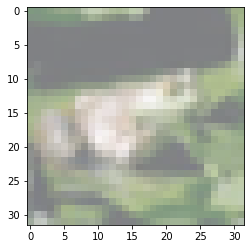

In [104]:
worked_attack_ratio = 0.0
n_images = 0
done=False
for image_batch, label_batch in test_dataloader:
    image_batch = image_batch.to(device)
    label_batch = label_batch.to(device)

    for image, label in zip(image_batch, label_batch):
        n_images += 1
        has_attack_worked, bad_image, new_label = fgsm_attack(model, image, label)
        worked_attack_ratio += has_attack_worked

        if has_attack_worked and model(image.unsqueeze(dim=0)).argmax() == label:
            done=True
            print(f'Worked! Changed class from {classes[label.item()]} to {classes[new_label]}')
            imshow(image.cpu())
    if done:
        break
worked_attack_ratio /= n_images

In [2]:
import matplotlib.pyplot as plt

plt.scatter([(1,1), (2,2), (3,3)])

TypeError: scatter() missing 1 required positional argument: 'y'